In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [2]:
#define sentences
sentences = ["Programming is a good habit",
            "This is bad code you must improve it",
            "This is a perfect idea",
            "Your code was clean and neat",
            "You are excellent programmer",
            "You have performed badly in the examinations",
            "You could have made it better",
            "Good work! Keep it up.",
            "Poor performance",
            "Improve yourself"]
#define labels
labels = array([1,0,1,1,1,0,0,1,0,0])


## Tokenization and one_hot_encoding

Our approach involves breaking down each sentence into individual words and representing each sequence as a vector using one-hot encoding.

In [3]:
# integer encode the sentences
vocabulary_size = 50
#get one hot encoding of the sentences 


encoded_sequence = [ one_hot(s, vocabulary_size) for s in sentences ]
print( encoded_sequence )

[[3, 12, 18, 5, 12], [6, 12, 1, 6, 15, 23, 8, 36], [6, 12, 18, 43, 45], [29, 6, 27, 7, 1, 25], [15, 32, 44, 39], [15, 5, 6, 40, 9, 21, 21], [15, 40, 5, 34, 36, 3], [5, 27, 47, 36, 48], [16, 37], [8, 30]]



The function called "one_hot" will require a sentence and a vocabulary_size as input parameters. The code shown above will use the "one_hot" function imported from Keras to convert all the sentences into an encoded form consisting of integers.

After performing the one_hot function on the sentences, the above result is the output.

But we can see that all the one_hot_encoded vectors are not of equal length, so to overcome this problem, we pad every sentence using the pad_sequences function. 

## Padding

The belowe code will pad every sequence. Following is the output after applying the pad_sqeuences function on the one_hot_encoded vectors. We can see that every sequence has a length of ten numbers. 

Number of zeros added to each vector = max_length - length of one_hot_encoded vecto

In [5]:
# pad documents to a max length of 10 words
max_length = 10
padded_sequence = pad_sequences( encoded_sequence, maxlen = max_length, padding='post' )# what is padding = 'pre - post'? 
print( padded_sequence )

 



[[ 3 12 18  5 12  0  0  0  0  0]
 [ 6 12  1  6 15 23  8 36  0  0]
 [ 6 12 18 43 45  0  0  0  0  0]
 [29  6 27  7  1 25  0  0  0  0]
 [15 32 44 39  0  0  0  0  0  0]
 [15  5  6 40  9 21 21  0  0  0]
 [15 40  5 34 36  3  0  0  0  0]
 [ 5 27 47 36 48  0  0  0  0  0]
 [16 37  0  0  0  0  0  0  0  0]
 [ 8 30  0  0  0  0  0  0  0  0]]


Till now we have created proper input data that we can feed to the embedding layer.

## Embedding layers


In the code below we are creating embedding layers.


input_dim: It is the vocabulary size of the input data. Suppose your data is encoded using integers from 0 to 500, then the vocabulary size will be 501 words.<br><br>
output_dim: It defines the length of the resulting vector for each word. The size of the vector may vary from 1 to any large integer.<br><br>
input_length: input_length is the total number of words in the input sequence. If all the sentences in your dataset contain 50 words, the input_length for that embedding layer will be 50.

In [6]:
# define the model
model = Sequential()
 

embedding_layer = Embedding( vocabulary_size, 10, input_length = max_length )
model.add( embedding_layer )
model.add( Flatten() )
# the purpose of flatten is to convert 2D array to 1D array

#add a hidden layer
model.add( Dense(5, activation='relu') )
#add output layer
model.add( Dense(1, activation='sigmoid') )
# compile the model
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
# summarize the model
print( model.summary())

## ÖDEV aşağıdaki parametrelere bakarak, derste gördüğümüz şekilde diagramını çizin. 100 alamayan arkadaşlar için ödevdir. 100 e tamamlamak için.




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 10)            500       
                                                                 
 dense (Dense)               (None, 10, 5)             55        
                                                                 
 dense_1 (Dense)             (None, 10, 1)             6         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
None


NOT: Derste yeterince açıklanan bir konu değildi Flatten konusu. Aşağıda açıklamasını ekleme gereği duydum.

Yukarıda embedding layer için boyutu  10 olarak belirledik. Sequence length de 10 olacak. Yani her bir cümleyi 10 kelime ile ve  içindeki kelimeleri 10 boyutlu vektörlerle temsil edeceğiz. Böylece embedding layer için input shape 10 olacak. Output shape ise 10x10 olacak. Neden 10x10? Çünkü her bir cümle 10 kelime ve her bir kelime 10 boyutlu vektör ile temsil edilecek. 

### Flatten
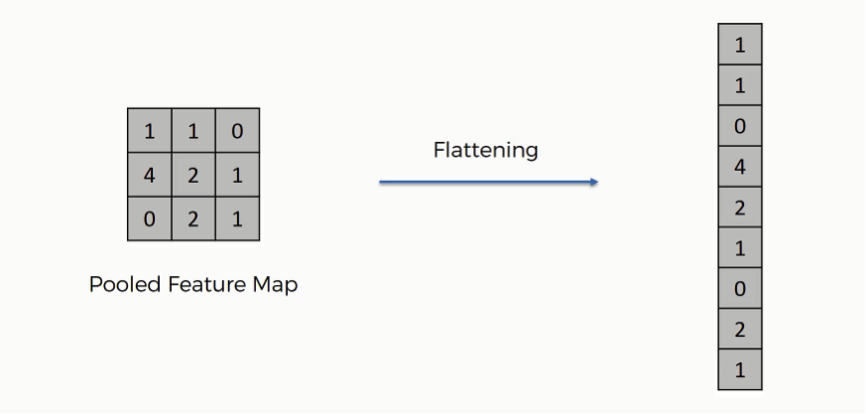

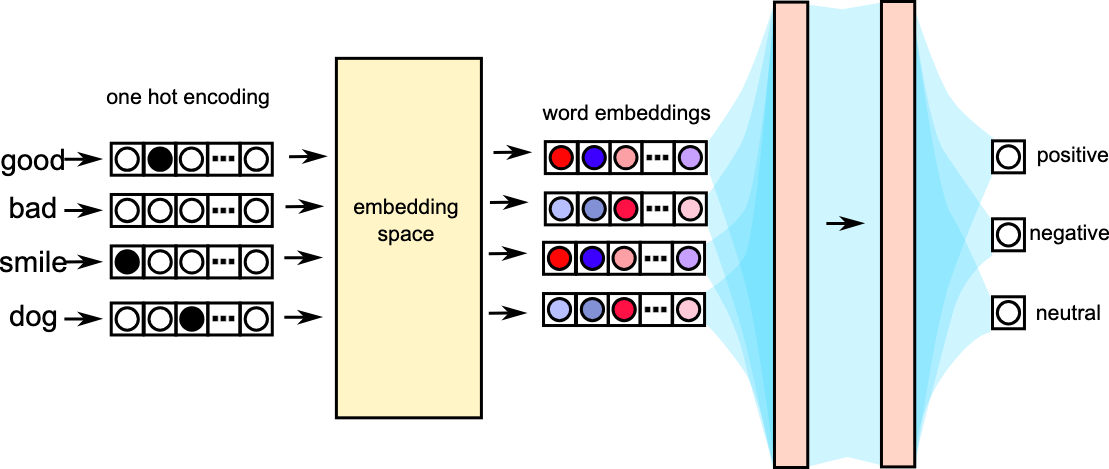

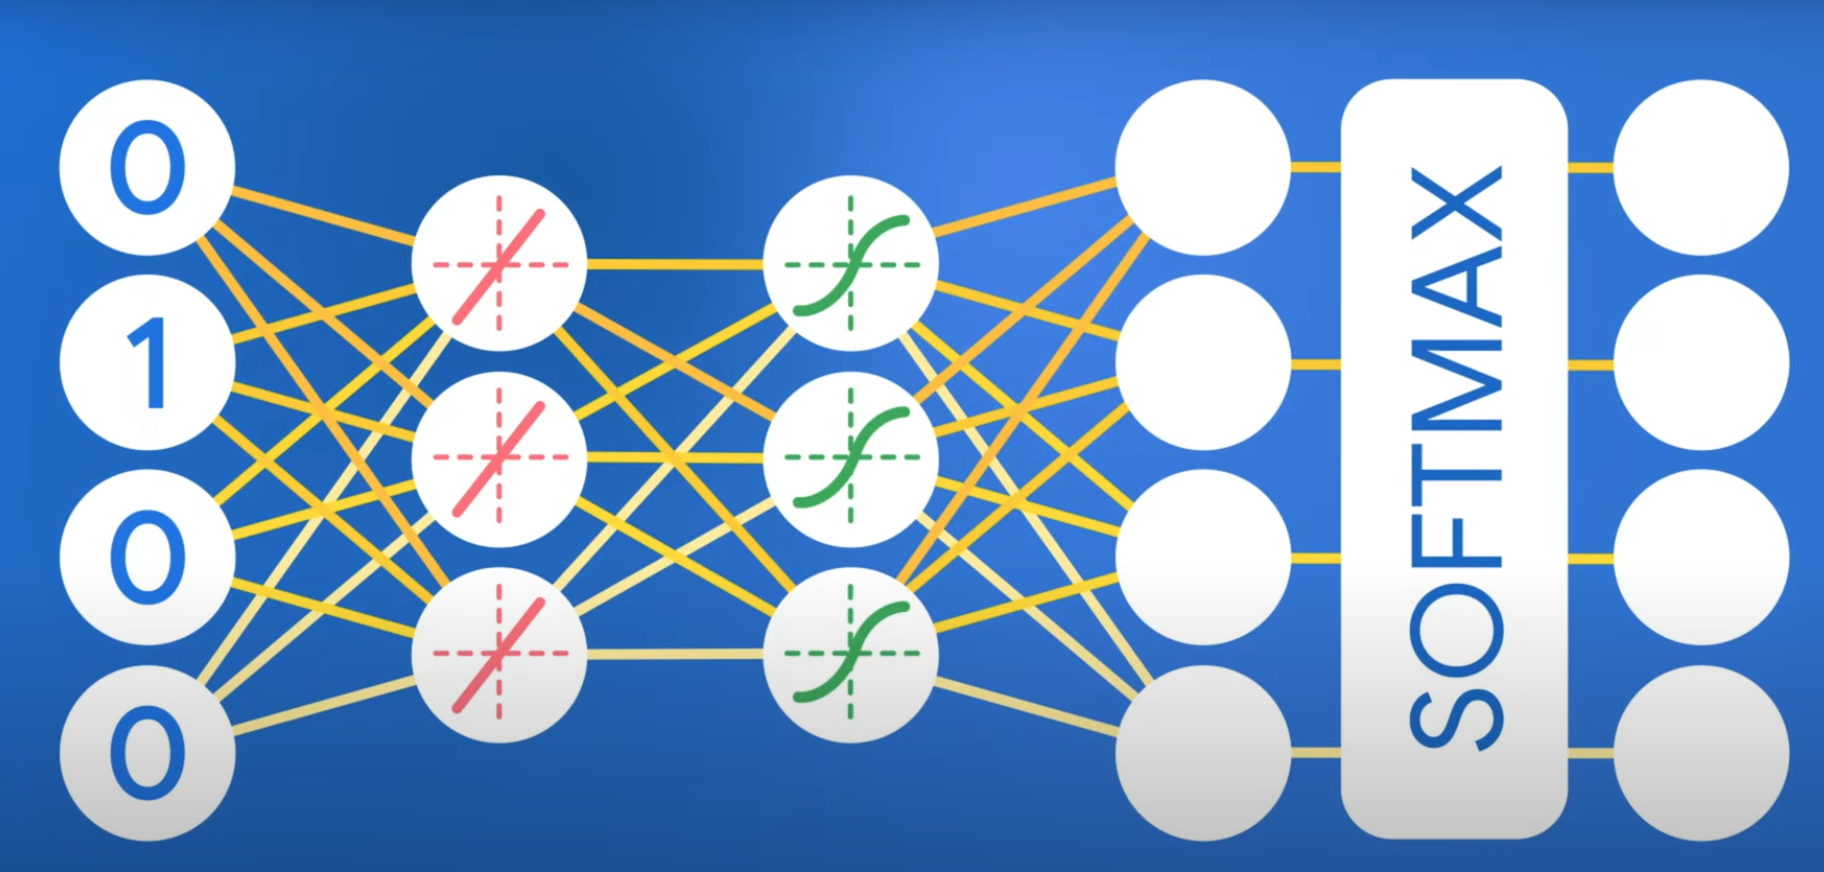

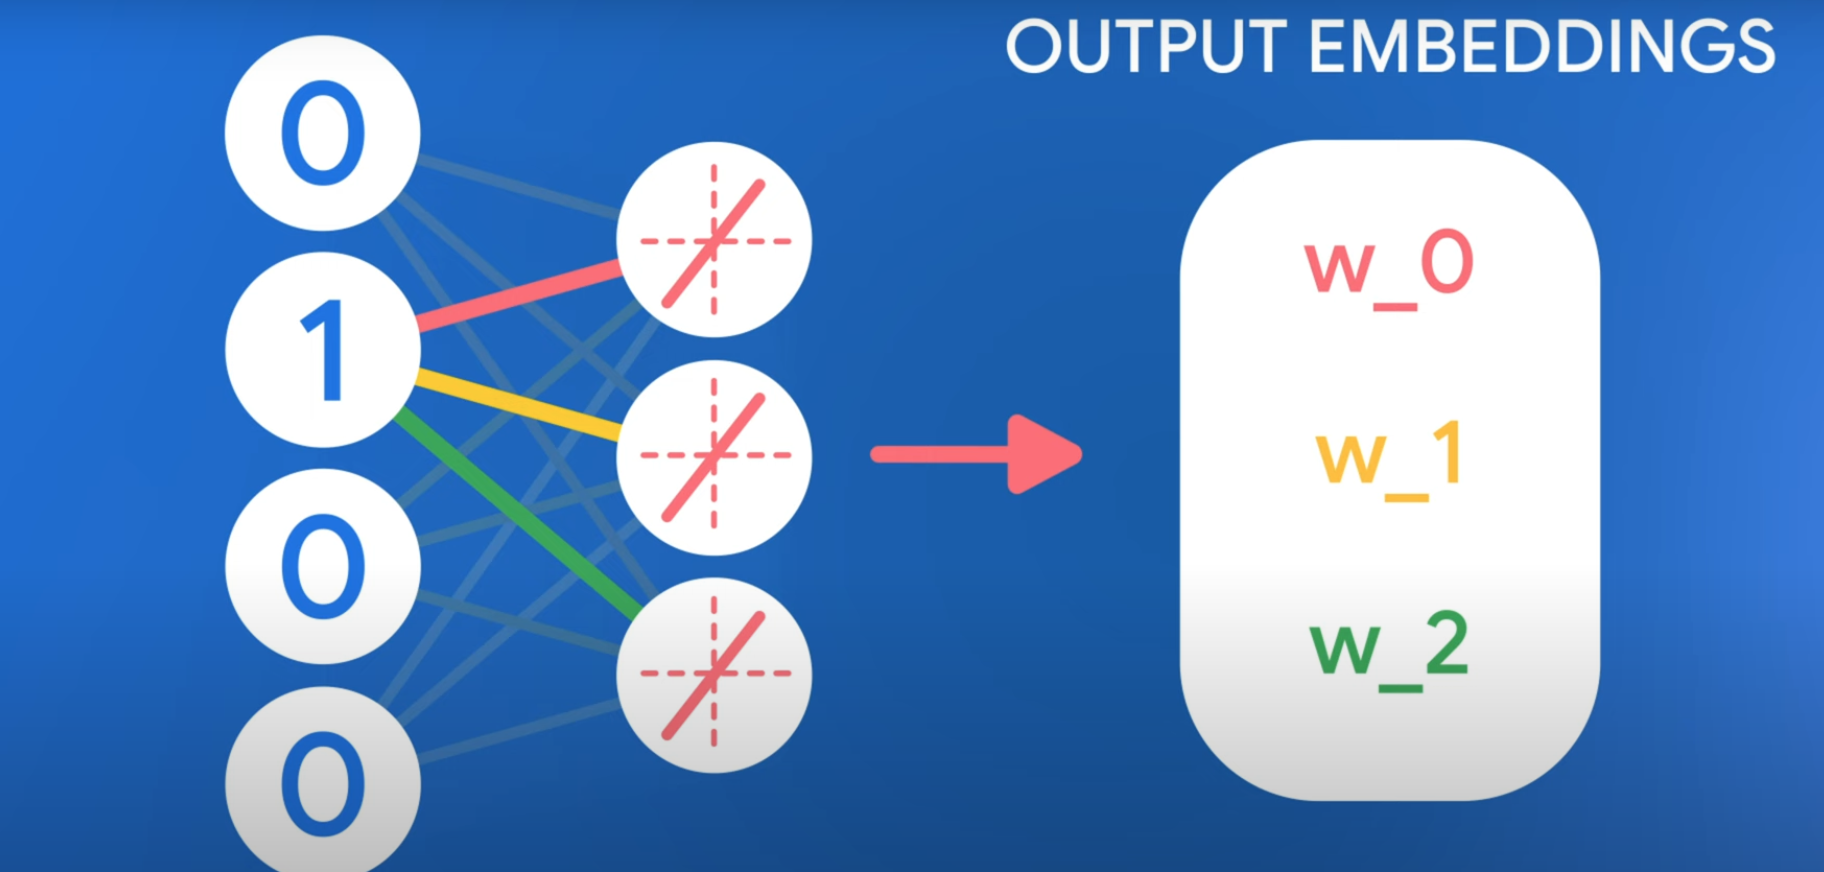

We are creating a sequential model. In the embedding layer, vocabulary_size is input_dim parameter, output_dim is set to 10, and input_length of the sequence is the length of the padded sequence (max_length), i.e., 10. After flattening it apply a dense layer using the sigmoid activation function. 

Compile the model using the adam optimizer and use the binary_crossentropy as a loss function. 

The summary of the model is displayed above.

## Train and evaluate the model

In [7]:
# fit the model 

#The padded_sequence and labels are then passed through this embedding layer. 
#Further accuracy of the model is evaluated
model.fit( padded_sequence, labels, epochs=50, verbose=1 )
# evaluate the model
loss, accuracy = model.evaluate( padded_sequence, labels, verbose=1 )
print( 'Accuracy: %f' % (accuracy*100) )

Epoch 1/50


2023-11-15 13:33:48.917065: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/kemalcankara/miniforge3/envs/tensyflow/lib/python3.8/site-packages/keras/backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 10, 1) vs (None,)).


In [10]:
print( embedding_layer.get_weights()[0].shape )
print( embedding_layer.get_weights()[0][0] )

(50, 10)
[ 0.05559702  0.09357906 -0.05553265  0.08981781  0.1021435   0.0019278
  0.08864797  0.01617965  0.08611438  0.07099809]


This embedding matrix will be of 50 rows and ten columns, where each row is a vector representation of a single word, as shown in the output above.

In [14]:
print( embedding_layer.get_weights()[0] )

[[ 2.07566451e-02  5.39089441e-02 -6.31357869e-03 -9.50537398e-02
  -2.96339300e-03  3.64407972e-02 -6.39673099e-02  5.03583364e-02
  -3.30541804e-02 -3.63569036e-02]
 [ 4.79694493e-02 -2.87858378e-02  1.50583126e-02 -3.03146485e-02
  -5.95621020e-03 -1.49281137e-02  4.60915081e-02 -4.35943604e-02
   3.43626998e-02  3.00067104e-02]
 [-3.88517305e-02  4.14259150e-04 -1.80004761e-02  5.91543736e-03
  -4.89794984e-02  1.09659359e-02 -7.34608471e-02  6.67759683e-03
  -4.73297238e-02  1.87136158e-02]
 [-2.53492203e-02 -3.25720012e-02  1.59038249e-02  4.62332480e-02
  -5.55877537e-02 -9.15337503e-02  7.49503598e-02  4.11885902e-02
  -4.39270511e-02  3.97972986e-02]
 [ 1.89119000e-02 -4.06373814e-02 -2.04454120e-02 -2.59760972e-02
   1.39644379e-02 -7.97134116e-02  2.91664638e-02  5.15240096e-02
  -1.23720067e-02 -8.22813623e-03]
 [ 2.30645277e-02 -4.28988449e-02 -3.77903804e-02 -1.06060132e-02
  -5.74961305e-05 -3.60951312e-02  1.58685781e-02  2.92763151e-02
   9.77170467e-03 -7.42354244e-03

## Gensim WORD2VEC model as embedding layer

In [26]:
from numpy import array
from numpy import asarray
from numpy import zeros 
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [27]:

# define documents
docs = ['Well done!',
 'Good work',
 'Great effort',
 'nice work',
 'Excellent!',
 'Weak',
 'Poor effort!',
 'not good',
 'poor work',
 'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)


[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


In [48]:
import os
from pathlib import Path


In [51]:


# Get the current notebook path
notebook_path = Path(os.getcwd())

# Get the parent directory of the current notebook
parent_dir = notebook_path.parent.parent

# Specify the name of the folder and the file
folder_name = "DATA"
file_name = "glove.6B.100d.e.txt"

# Get the path to the file
file_path = os.path.join(parent_dir, folder_name, file_name)

In [62]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
#open a text file in upper folder
#read txt from file from another folder and store in embeddings_index and don't use __file__   

 
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = [float(val) for val in values[1:]]
        embeddings_index[word] = coefs


f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))



[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
Loaded 400001 word vectors.


In [63]:

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 4, 100)            1500      
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________
None
Accuracy: 100.000000
